In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')

In [3]:
df=pd.read_csv('prepared_individual_data/Acidity.csv',index_col=0,parse_dates=[0],date_parser=parser)

/home/manjit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [4]:
df.head()

,Acidity
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

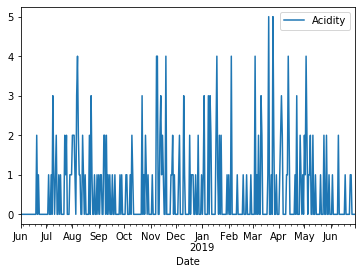

In [6]:
df.plot()

In [7]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

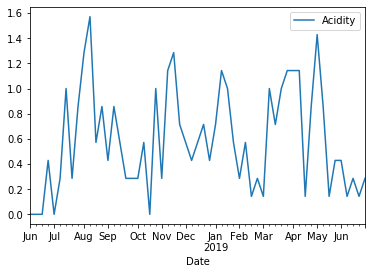

In [8]:
df_urti_weeklyM.plot()

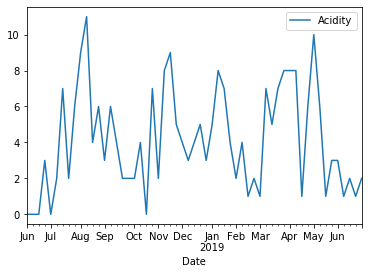

In [9]:
df_urti_weeklyS.plot()

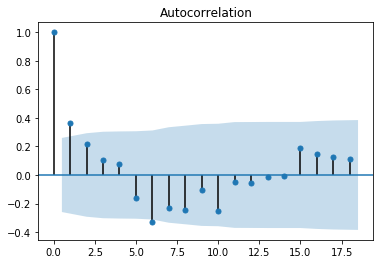

In [10]:
plot_acf(df_urti_weeklyM);

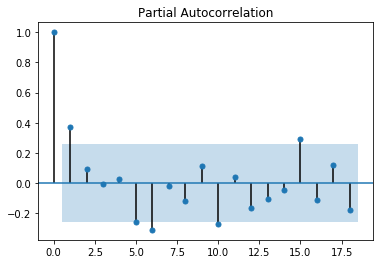

In [11]:
plot_pacf(df_urti_weeklyM);

# ARMA on weekly data

In [231]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

In [232]:
df_weekly.head()

,Acidity
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.428571
2018-07-01,-0.428571
2018-07-08,0.285714


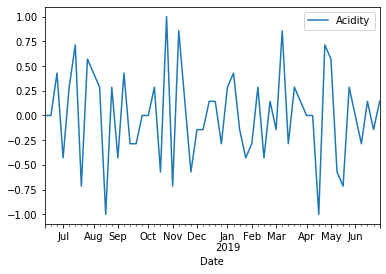

In [233]:
df_weekly.plot()

In [234]:
from statsmodels.tsa.stattools import adfuller

In [235]:
X=df_weekly['Acidity'].values
result=adfuller(X)
print("ADF Statistic: %f" % result[0])
print("p-value:  %f" % result[1])
print('Critical values: ')
for key,value in result[4].items():
    print("\t%s: %.3f" % (key,value))
if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is stationary")
else:
    print("Failed to reject Ho - Time Series is not stationary")

ADF Statistic: -11.082368
p-value:  0.000000
Critical values: 
	1%: -3.555
	5%: -2.916
	10%: -2.596
Reject Ho - Time Series is stationary


In [236]:
df_weekly.size

56

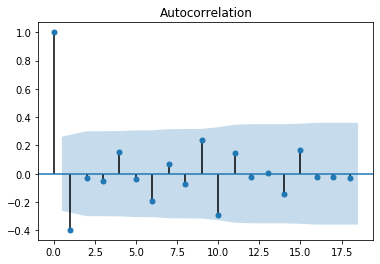

In [237]:
plot_acf(df_weekly);

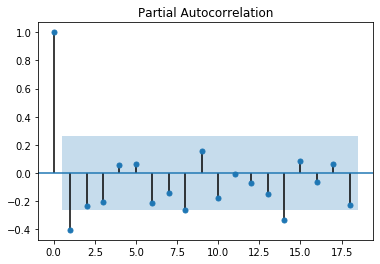

In [238]:
plot_pacf(df_weekly);

In [239]:
total=df_weekly
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [240]:
test_size

14

In [241]:
train_size

42

In [242]:
total.size

56

In [243]:
train=total[:train_size]

In [244]:
test=total[train_size:]

In [245]:
train.size+test.size

56

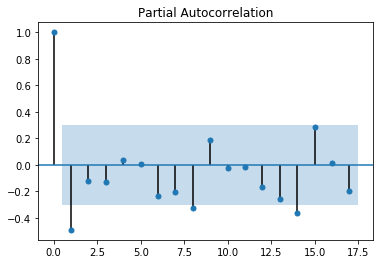

In [246]:
plot_pacf(train);

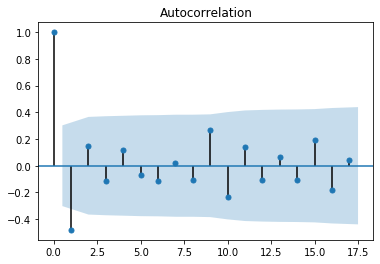

In [247]:
plot_acf(train);

In [217]:
from statsmodels.tsa.arima_model import ARMA

In [274]:
arma_model=ARMA(train,order=(15,3))
arma_model_fit=arma_model.fit()

/home/manjit/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [275]:
arma_preds=arma_model_fit.predict(start=(train_size),end=(total.size-1))

In [276]:
arma_preds.size

14

In [277]:
arma_preds

2019-03-31   -0.186044
2019-04-07    0.243355
2019-04-14   -0.181828
2019-04-21   -0.307516
2019-04-28    0.261152
2019-05-05   -0.086110
2019-05-12   -0.053066
2019-05-19   -0.233440
2019-05-26    0.311286
2019-06-02   -0.259035
2019-06-09   -0.025385
2019-06-16   -0.085146
2019-06-23    0.252415
2019-06-30    0.056309
Freq: W-SUN, dtype: float64

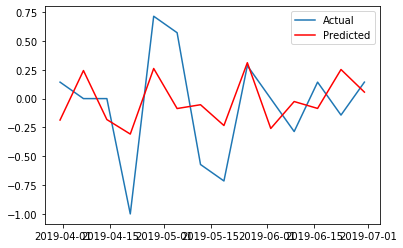

In [279]:
plt.plot(test,label='Actual')
plt.plot(arma_preds,color='red',label='Predicted')
plt.legend()

In [280]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acs

In [281]:
mse(y_true=test,y_pred=arma_preds)

0.15491660554272962

In [282]:
pred_values=arma_preds.values
test_values=test.values